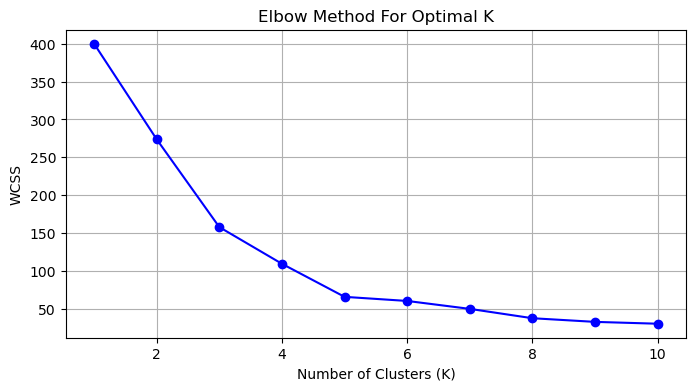

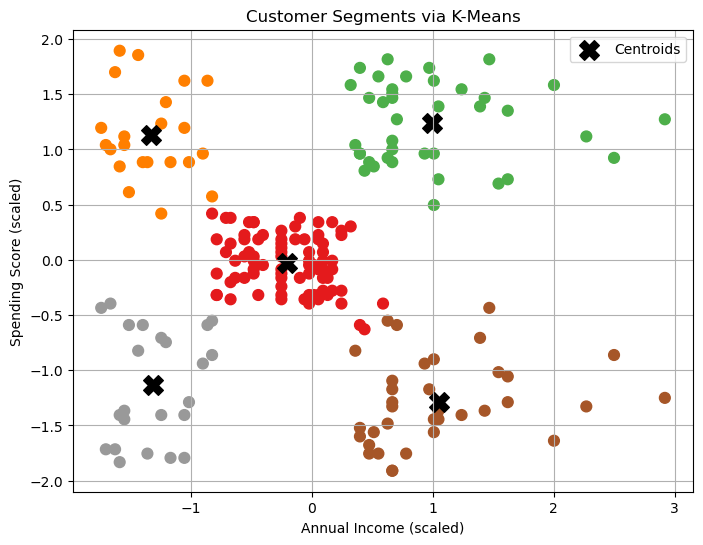

Silhouette Score (K=5): 0.555


In [2]:
# mall_kmeans_clustering.py

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Suppress specific KMeans memory leak warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# 1. Load and prepare dataset
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Fit K-Means with initial guess for K
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

# 3. Elbow Method to find optimal K
wcss = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, 'bo-')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 4. Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='Set1', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='black', marker='X', s=200, label='Centroids')
plt.title('Customer Segments via K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Evaluate clustering
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score (K=5): {score:.3f}")
